## Data from World Happiness Report

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

In this notebook we will explore the happiness of different countries and the features associated.
The datasets that we will use are available in *Data*: **happiness2020.pkl** and **countries_info.csv**.

Although the features are self-explanatory, here a summary: 

**happiness2020.pkl**
* country: *Name of the country*
* happiness_score: *Happiness score*
* social_support: *Social support (mitigation the effects of inequality)*
* healthy_life_expectancy: *Healthy Life Expectancy*
* freedom_of_choices: *Freedom to make life choices*
* generosity: *Generosity (charity, volunteers)*
* perception_of_corruption: *Corruption Perception*
* world_region: *Area of the world of the country*

**countries_info.csv**
* country_name: *Name of the country*
* area: *Area in sq mi*
* population: *Number of people*
* literacy: *Literacy percentage*

In [1149]:
!head Data/countries_info.csv

'head' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [1150]:
import pandas as pd
%matplotlib inline

DATA_FOLDER = 'Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.csv"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

## Task 1: Load the data

Load the 2 datasets in Pandas dataframes (called *happiness* and *countries*), and show the first rows.


**Hint**: Use the correct reader and verify the data has the expected format.

In [1151]:
# Write your code here

happiness = pd.read_csv(HAPPINESS_DATASET, sep=',')
happiness.head()

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States


In [1152]:

#countries = pd.read_csv(COUNTRIES_DATASET, sep=',')
countries = pd.read_csv(COUNTRIES_DATASET, decimal=',')
countries.head()

,country_name,area,population,literacy
0,afghanistan,647500,31056997,36.0
1,albania,28748,3581655,86.5
2,algeria,2381740,32930091,70.0
3,argentina,2766890,39921833,97.1
4,armenia,29800,2976372,98.6


In [1153]:
happiness.shape

(135, 8)

In [1154]:
countries.shape

(135, 4)

## Task 2: Let's merge the data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

**Hint**: Verify that all the rows are in the final dataframe.

In [1155]:
#countries = countries.rename(columns={'country_name': 'country'})
#countries['country'] = countries['country'].apply(lambda r:r.capitalize())
happiness['country_name'] = happiness['country'].apply(lambda x:x.lower())
#countries.head()
happiness.head()

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,country_name
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,afghanistan
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,albania
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,algeria
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,argentina
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,armenia


In [1156]:
countries.shape

(135, 4)

In [1157]:
happiness.shape

(135, 9)

In [1158]:
# Write your code here

#country_features = pd.merge(happiness, countries)
#country_features = happiness.merge(countries, on="country")
country_features = happiness.merge(countries, on="country_name").drop("country_name", axis=1)
country_features.head()

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500,31056997,36.0
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748,3581655,86.5
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,2381740,32930091,70.0
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,2766890,39921833,97.1
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,29800,2976372,98.6


In [1159]:
country_features.shape

(135, 11)

## Task 3: Where are people happier?

Print the top 10 countries based on their happiness score (higher is better).

In [1160]:
# Write your code here

#country_features['happiness_score'].sort_values(ascending=False).head(10)
country_features.sort_values('happiness_score', ascending=False)[['country', 'happiness_score']].head(10)


,country,happiness_score
38,Finland,7.8087
31,Denmark,7.6456
115,Switzerland,7.5599
50,Iceland,7.5045
92,Norway,7.4880
87,Netherlands,7.4489
114,Sweden,7.3535
88,New Zealand,7.2996
6,Austria,7.2942
72,Luxembourg,7.2375


We are interested to know in what world region people are happier. 

Create and print a dataframe with the (1) average happiness score and (2) the number of countries for each world region.
Sort the result to show the happiness ranking.

In [1161]:
# Write your code here

regions_features = country_features.pivot_table(index=['world_region'], columns='country', values='happiness_score', aggfunc=max)
regions_features.head(3)

C:\Users\babou\AppData\Local\Temp\ipykernel_1556\272679608.py:3: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  regions_features = country_features.pivot_table(index=['world_region'], columns='country', values='happiness_score', aggfunc=max)


country,Afghanistan,Albania,Algeria,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
world_region,,,,,,,,,,,,,,,,,,,,,
Central and Eastern Europe,NaN,4.8827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commonwealth of Independent States,NaN,NaN,NaN,NaN,4.6768,NaN,NaN,5.1648,NaN,NaN,...,NaN,NaN,NaN,NaN,6.2576,NaN,NaN,NaN,NaN,NaN
East Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1162]:
regions_features['mean_happiness_score'] = regions_features.mean(axis=1)
regions_features['nbr_of_countries'] = regions_features.drop(columns=['mean_happiness_score']).count(axis=1)
regions_features.head(3)

country,Afghanistan,Albania,Algeria,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,...,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe,mean_happiness_score,nbr_of_countries
world_region,,,,,,,,,,,,,,,,,,,,,
Central and Eastern Europe,NaN,4.8827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.891393,14
Commonwealth of Independent States,NaN,NaN,NaN,NaN,4.6768,NaN,NaN,5.1648,NaN,NaN,...,NaN,NaN,6.2576,NaN,NaN,NaN,NaN,NaN,5.358342,12
East Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.483633,3


In [1163]:
regions_features_summary = regions_features[['mean_happiness_score', 'nbr_of_countries']]
regions_features_summary = regions_features_summary.sort_values('mean_happiness_score', ascending=False)[['mean_happiness_score', 'nbr_of_countries']]
regions_features_summary.head(3)

country,mean_happiness_score,nbr_of_countries
world_region,,
North America and ANZ,7.173525,4
Western Europe,6.967405,20
Latin America and Caribbean,5.971280,20


The first region has only a few countries! Which ones are they and what is their score?

In [1164]:
# Write your code here

happy_countries = regions_features.loc[['North America and ANZ']] # DOUBLE BRACKETS TO KEEP DATAFRAME FORMAT
happy_countries = happy_countries.dropna(axis=1)

#happy_countries = country_features[country_features['world_region'] == 'North America and ANZ']

happy_countries.head()

country,Australia,Canada,New Zealand,United States,mean_happiness_score,nbr_of_countries
world_region,,,,,,
North America and ANZ,7.2228,7.2321,7.2996,6.9396,7.173525,4


## Task 4: How literate is the world?

Print the names of the countries with a level of literacy of 100%. 

For each country, print the name and the world region in the format: *{region name} - {country name} ({happiness score})*

In [1165]:
# Write your code here

country_features.head()

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500,31056997,36.0
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748,3581655,86.5
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,2381740,32930091,70.0
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,2766890,39921833,97.1
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,29800,2976372,98.6


In [1166]:

literacy_100 = country_features[country_features['literacy'] == 100]
literacy_100 = literacy_100[['world_region', 'country', 'happiness_score']]
print(literacy_100)

             world_region     country  happiness_score
5   North America and ANZ   Australia           7.2228
31         Western Europe     Denmark           7.6456
38         Western Europe     Finland           7.8087
72         Western Europe  Luxembourg           7.2375
92         Western Europe      Norway           7.4880


What is the global average?

In [1167]:
# Write your code here
print(country_features['literacy'].mean())

81.85112781954888


Calculate the proportion of countries with a literacy level below 50%. Print the value in percentage, formatted with 2 decimals.

In [1168]:
# Write your code here

nbr_of_total_countries = country_features.shape[0]

literacy_under_50 = country_features.query('literacy < 50')
nbr_of_under_50_countries = literacy_under_50.shape[0]

proportion = nbr_of_under_50_countries / nbr_of_total_countries
print("Percentage of countries with literacy level < 50%: {:.2%}".format(proportion))

Percentage of countries with literacy level < 50%: 11.85%


Print the raw number and the percentage of world population that is illiterate.

In [1169]:
# Write your code here

#WRONG

nbr_of_total_pop = country_features['population'].sum()
mean_illiteracy = 100 - country_features['literacy'].fillna(0).mean()
nbr_of_illiterate_pop = mean_illiteracy/100 * nbr_of_total_pop
print('The raw number of illiterate population is: {:.0f}'.format(nbr_of_illiterate_pop))
print('This represents: {:.2f}% of the total world population'.format(mean_illiteracy))

#WRONG

The raw number of illiterate population is: 1189855024
This represents: 19.36% of the total world population


In [1170]:
illiterate_people = country_features.population * (100 - country_features.literacy)/100
illiterate_fraction = illiterate_people.sum() / country_features.population.sum()

print("Illiterate people: {:.0f} ({:.2%})".format(illiterate_people.sum(), illiterate_fraction))

Illiterate people: 1249372988 (20.33%)


## Task 5: Population density

Add to the dataframe a new field called *population_density* computed by dividing *population* by *area*.

In [1171]:
# Write your code here

country_features['population_density'] = country_features['population']/country_features['area']
country_features.head()


,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy,population_density
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500,31056997,36.0,47.964474
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748,3581655,86.5,124.587971
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,2381740,32930091,70.0,13.826065
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,2766890,39921833,97.1,14.428413
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,29800,2976372,98.6,99.878255


What is the happiness score of the 3 countries with the lowest population density?

In [1172]:
# Write your code here

lowest_pop_density = country_features.sort_values('population_density', ascending=True)[['country', 'happiness_score']]
lowest_pop_density.head(3)

,country,happiness_score
83,Mongolia,5.4562
5,Australia,7.2228
14,Botswana,3.4789


## Task 6: Healthy and happy?

Plot in a scatter plot the happiness score (x) and healthy life expectancy (y).

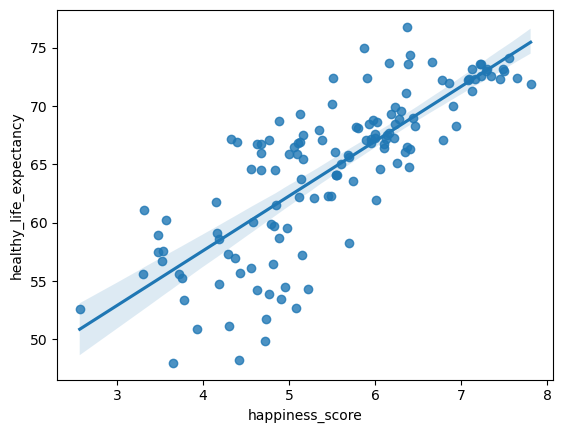

In [1174]:
# Write your code here

import matplotlib.pyplot as plt

country_features.plot.scatter(x='happiness_score', y='healthy_life_expectancy')

plt.show()

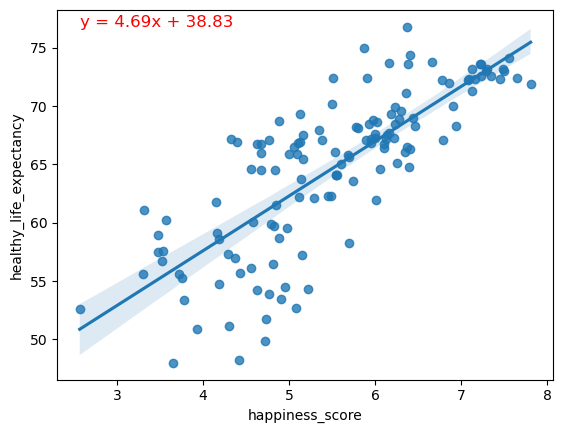

In [1176]:
#BONUS

import seaborn as sns
from scipy import stats

# Perform linear regression using scipy
slope, intercept, r_value, p_value, std_err = stats.linregress(country_features['happiness_score'], country_features['healthy_life_expectancy'])

# Create scatter plot with regression line using seaborn
sns.regplot(x='happiness_score', y='healthy_life_expectancy', data=country_features)

# Display the regression equation on the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(x=country_features['happiness_score'].min(), 
         y=country_features['healthy_life_expectancy'].max(), 
         s=equation, 
         color='red', 
         fontsize=12)

# Show the plot
plt.show()

Feel free to continue the exploration of the dataset! We'll release the solutions next week.

----
Enjoy EPFL and be happy, next year Switzerland must be #1.